#### Procesamiento Digital de Señales

# Tarea Semanal 2

#### Por Nahuel Braian Contreras

Se realizo el algoritmo de la Transformada Discreta de Fourier (DFT), el cual esta representado por la siguiente expresion:

\begin{equation}
X_k = \sum_{n=0}^{N-1}x_n.e^{-j\,2\pi.k.n/N}
\end{equation}

A partir de la formula se procedio a implementarla en python y la pusimos a prueba, haciendo uso de la funcion generadora de señales senoidales realizada en la TS1.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def mi_funcion_DFT(xx):

    N = len(xx) #obtengo el largo del vector
    n = np.arange(N) #armo el vector n
    
    k = n.reshape((N, 1)) #armo el vector columna K
    
    #Se realizara todo el recorrido de n por cada fila de K.
    exponent = np.exp(-2j*np.pi*k*(n/N)) #armo la parte exponencial
    
    XX = np.dot(exponent, xx) 
    #realizo la multiplicacion entre mi vector de datos de entrada y mi vector exponencial
    
    return XX

Ahora generaremos una señal senoidal, para posteriormente calcularle su transformada de fourier discreta.

Text(0, 0.5, 'Amplitud DFT')

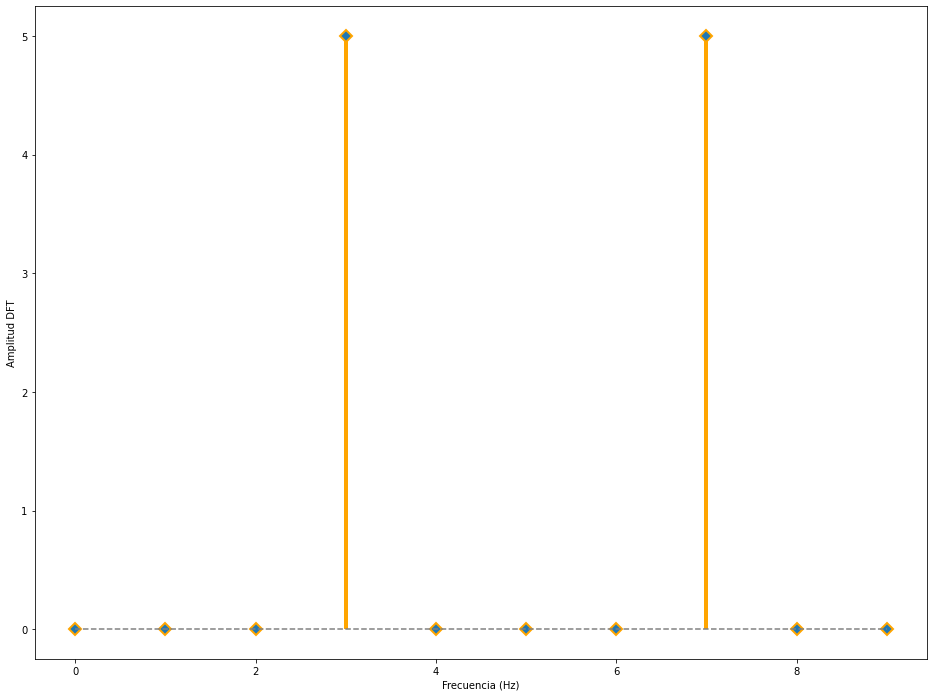

In [60]:
def my_senoidal (N, freq_M, amplitud = 1, valor_medio = 0, freq = 1, fase = 0):
    
    ts = 1/freq_M
    
    tt = np.linspace(0, (N-1)*ts, N)
    
    xx = amplitud * np.sin(2*np.pi*(freq)*tt + fase) + valor_medio
    
    return(tt,xx)

# Parametrizo mi señal senoidal
N = 10
freq_M = 10
amplitud = 1
valor_medio = 0
freq = 3
fase = np.pi*0

[t, y] = my_senoidal(N,freq_M, amplitud, valor_medio, freq, fase)

XX = mi_funcion_DFT(y)

# Armo el vector para graficar la DFT
n = np.arange(N)
Res_esp = freq_M/N
f = n*Res_esp

#Grafico
(markers, stemlines, baseline) = plt.stem(f,abs(XX),label='calculado')
plt.gcf().set_size_inches(16, 12)
plt.setp(markers, marker='D', markersize=8, markeredgecolor="orange", markeredgewidth=2)
plt.setp(baseline, color="grey", linestyle="--" )
plt.setp(stemlines, color="orange", linewidth=4)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud DFT')

Nuestra señal senoidal es de frecuencia 3Hz, por lo que esperamos ver un delta en esa frecuencia. Podemos notar que tenemos otro delta en 7Hz. Esto corresponde a la replica que se produce despues de la frecuencia de Nysquit, que para una frecuencia de muestreo de 10Hz, se encuentra ubicado en 5Hz. Podemos notar que los dos deltas estan equidistanciados de Nysquit.

Para corrobar que nuestro codigo esta bien hecho, probamos de usar la funcion de python np.fft.fft, que correspode a la **Transformada Rapida de Fourier(FFT)**

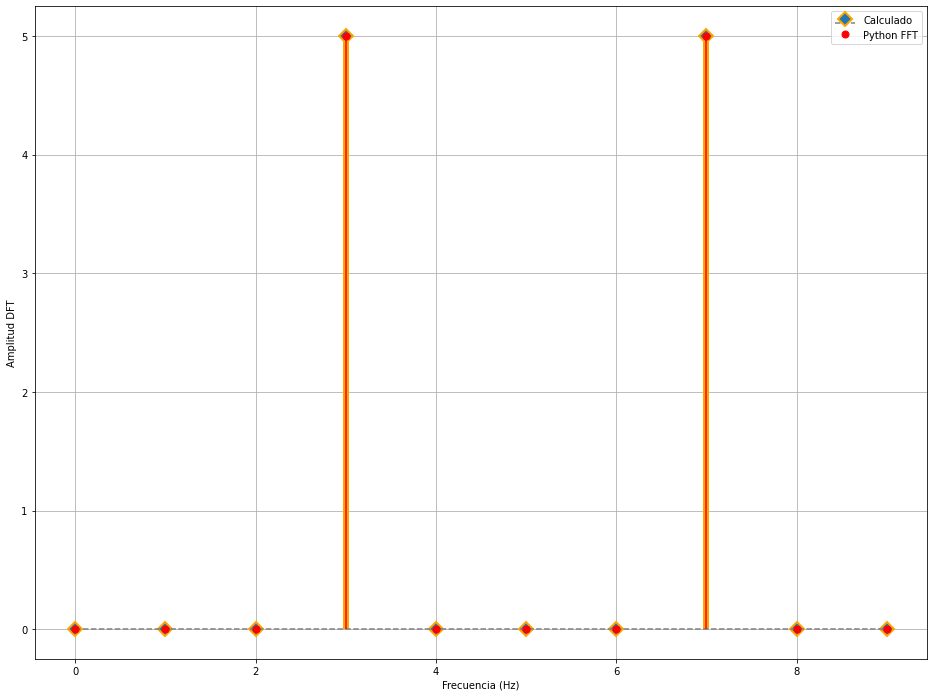

In [61]:
#Uso la funcion provista por python para el calculo de la DFT
XX_py = np.fft.fft(y)

#Grafico de mi funcion creada
(markers, stemlines, baseline) = plt.stem(f,abs(XX),label='Calculado')
plt.gcf().set_size_inches(16, 12)
plt.setp(markers, marker='D', markersize=10, markeredgecolor="orange", markeredgewidth=2)
plt.setp(baseline, color="grey", linestyle="--" )
plt.setp(stemlines, color="orange", linewidth=6)

#Grafico funcion python
(markers, stemlines, baseline) = plt.stem(f,abs(XX_py),label='Python FFT',basefmt=" ")
plt.setp(markers, color="red",markersize=7)
plt.setp(stemlines, color="red")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud DFT')
plt.legend()
plt.grid()

Podemos notar que practimente son iguales